In [2]:
import pandas as pd
from datetime import datetime as dt
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from datetime import timedelta

In [3]:
# https://www.cryptoarchive.com.au/asset/DOGE --> Doge EUR
folderpath = "../../Data/QMEF/"

df = pd.read_csv(folderpath + 'BTCUSDT.csv', sep='|', header=None)

# https://www.cryptoarchive.com.au/faq
df.columns = ['timestamp', 'Open', 'High', 'Low', 'Close', 'Volume', 'Taker Buy Quote Asset Volume', 
                'Taker Buy Base Asset Volume', 'Quote Asset Volume', 'Number of trades']
# Quote Asset Volume verwenden. Volume ist im Verhältnis zu BTC.

df

,timestamp,Open,High,Low,Close,Volume,Taker Buy Quote Asset Volume,Taker Buy Base Asset Volume,Quote Asset Volume,Number of trades
0,1502942400,4261.48,4261.48,4261.48,4261.48,1.775183,320.390851,0.075183,7564.906851,3
1,1502942460,4261.48,4261.48,4261.48,4261.48,0.000000,0.000000,0.000000,0.000000,0
2,1502942520,4280.56,4280.56,4280.56,4280.56,0.261074,1117.542921,0.261074,1117.542921,2
3,1502942580,4261.48,4261.48,4261.48,4261.48,0.012008,51.171852,0.012008,51.171852,3
4,1502942640,4261.48,4261.48,4261.48,4261.48,0.140796,599.999338,0.140796,599.999338,1
...,...,...,...,...,...,...,...,...,...,...
3120426,1690681620,29325.90,29325.91,29325.90,29325.91,1.199590,5545.822840,0.189110,35179.058270,108
3120427,1690681680,29325.91,29325.91,29324.60,29324.72,3.922770,34683.135800,1.182680,115038.629410,140
3120428,1690681740,29324.72,29324.73,29324.72,29324.72,0.562730,10083.601660,0.343860,16501.903120,106
3120429,1690681800,29324.73,29327.67,29324.72,29327.67,3.839800,98416.039460,3.355980,112605.116370,235


In [5]:
# Ich muss in der Tweet-Analyse nochmal mit neuen Keywords die Bitcoin-Tweets finden und separat abspeichern.
# // TODO: Bitcoin-Tweets speichern.

df_tweets = pd.read_csv("../../Data/QMEF/btc_tweet_analysis.csv", sep=";", encoding='utf8', parse_dates=['CreatedAt', 'UTC'])
df_tweets.drop_duplicates('TweetId', inplace = True)

df_tweets['timestamp'] = df_tweets['UTC'].apply(lambda x: x.astype('int')//10**9)
df_tweets['timestamp'] = df_tweets['timestamp'] - (df_tweets['timestamp'] % 60) #Abrunden auf Minuten

df_tweets = df_tweets[['UTC', 'timestamp', 'Text', 'Favorites', 'Retweets', 'neg', 'neu', 'pos', 'compound']]
# df_tweets = df_tweets.merge(df_doge, left_on='Date', right_on='Date')
# df_tweets_relevant = df_tweets.loc[(df_tweets['Favorites'] >= 500_000) & (df_tweets['Retweets'] >= 50_000)].copy()

df_tweets['UTC'] = pd.to_datetime(df_tweets['UTC'])
# Zeitdauer von 6 Stunden
time_threshold = timedelta(hours=6)

# Liste für Zeilen, die behalten werden sollen
df_tweets_relevant = []

# Iteriere über jeden Eintrag im DataFrame
for index, row in df_tweets.iterrows():
    utc_time = row['UTC']
    
    # Überprüfe die Differenz zur 'UTC'-Spalte aller anderen Einträge
    time_difference = abs(df_tweets.loc[df_tweets.index != index, 'UTC'] - utc_time)
    
    # Wenn die Differenz größer oder gleich 6 Stunden ist, behalte den Eintrag
    if (time_difference >= time_threshold).all():
        df_tweets_relevant.append(index)

# Filtere den DataFrame nach den ausgewählten Zeilen
df_tweets_relevant = df_tweets.loc[df_tweets_relevant]
df_tweets_relevant

,UTC,timestamp,Text,Favorites,Retweets,neg,neu,pos,compound
0,2021-02-20 07:02:06+00:00,1613804520,"@PeterSchiff That said, BTC &amp; ETH do seem ...",19278,2008,0.000,0.763,0.237,0.4215
1,2020-11-16 22:02:51+00:00,1605564120,@Maisie_Williams 🎶 Toss a bitcoin to ur Witcher 🎶,65905,3291,0.000,1.000,0.000,0.0000
2,2021-02-08 05:27:36+00:00,1612762020,"@itsALLrisky Doge appears to be inflationary, ...",15504,3567,0.132,0.787,0.081,-0.3291
3,2021-04-26 23:15:01+00:00,1619478900,"@stoolpresidente No, you do not. I have not so...",99315,13345,0.000,1.000,0.000,0.0000
4,2021-03-12 18:58:22+00:00,1615575480,BTC (Bitcoin) is an anagram of TBC(The Boring ...,244538,17664,0.191,0.809,0.000,-0.3802
7,2021-05-12 22:06:14+00:00,1620857160,Tesla &amp; Bitcoin https://t.co/YSswJmVZhP,495952,77611,0.000,1.000,0.000,0.0000


C:\Users\ckopp\AppData\Local\Temp\ipykernel_20088\1494792337.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced['log_returns'] = np.log(doge_sliced['Close'] / doge_sliced['Close'].shift(1))
C:\Users\ckopp\AppData\Local\Temp\ipykernel_20088\1494792337.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced.loc[0, 'log_returns'] = 0


Expected Return =  -4.4900623832960184e-05
T[0; 1] =  -2.836445994005796
T[0; 5] =  -3.094643583714738
T[0; 10] =  -3.734198940157742
T[0; 30] =  -0.9604948393673636
T[0; 60] =  -0.9437074988672255
T[0; 120] =  -0.5544413551598847


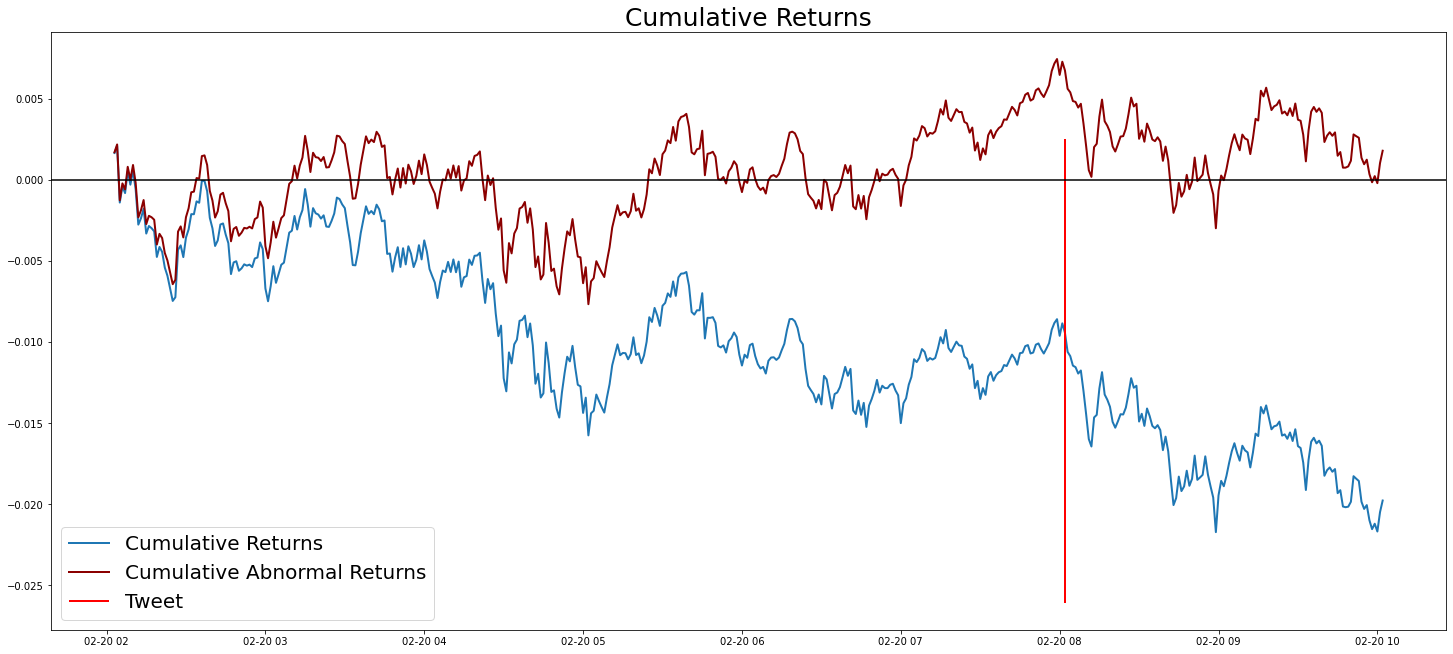

C:\Users\ckopp\AppData\Local\Temp\ipykernel_20088\1494792337.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced['log_returns'] = np.log(doge_sliced['Close'] / doge_sliced['Close'].shift(1))
C:\Users\ckopp\AppData\Local\Temp\ipykernel_20088\1494792337.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced.loc[0, 'log_returns'] = 0


Expected Return =  7.48480378579025e-05
T[0; 1] =  -0.2556507008871264
T[0; 5] =  -0.26290013071478296
T[0; 10] =  -0.7462742483472293
T[0; 30] =  -0.45883013295583497
T[0; 60] =  -0.5101396371500473
T[0; 120] =  -1.1265496458902193


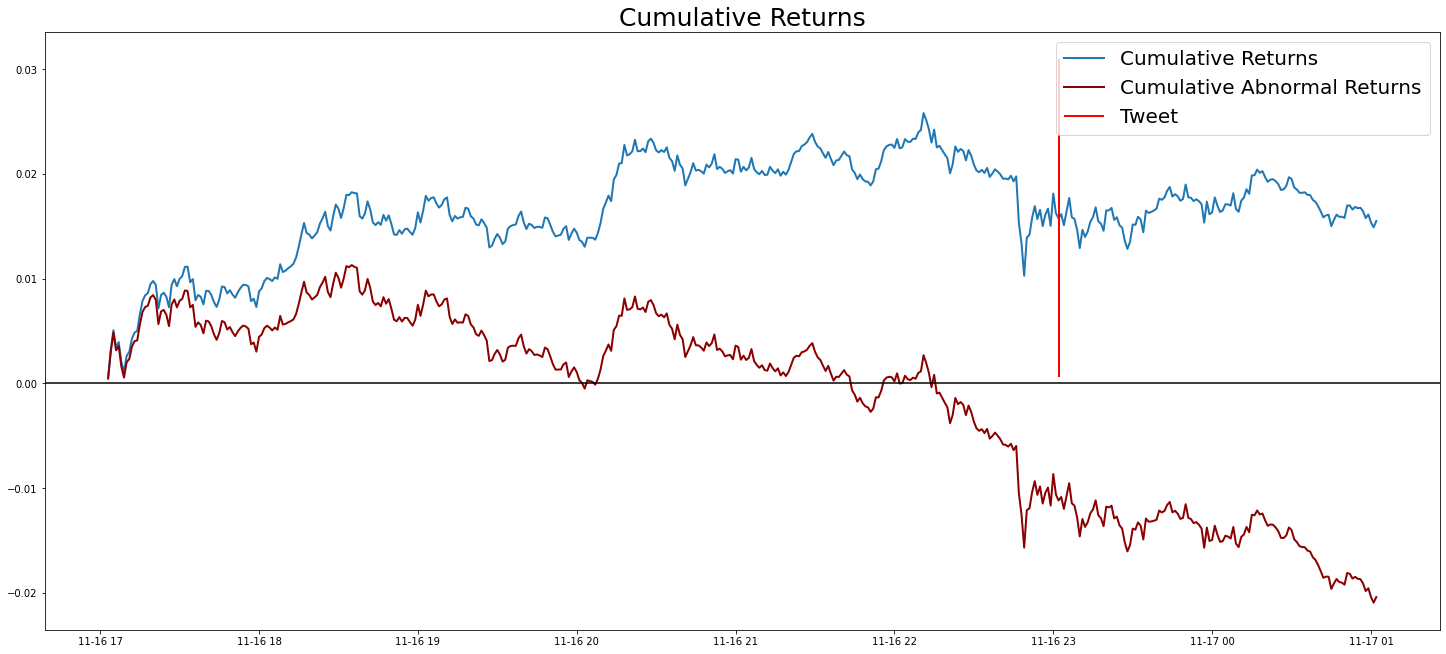

C:\Users\ckopp\AppData\Local\Temp\ipykernel_20088\1494792337.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced['log_returns'] = np.log(doge_sliced['Close'] / doge_sliced['Close'].shift(1))
C:\Users\ckopp\AppData\Local\Temp\ipykernel_20088\1494792337.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced.loc[0, 'log_returns'] = 0


Expected Return =  -3.277347509483498e-05
T[0; 1] =  0.08981227202905842
T[0; 5] =  0.6144135280426424
T[0; 10] =  1.191650123233049
T[0; 30] =  0.4590816956017414
T[0; 60] =  2.2968312558025494
T[0; 120] =  1.4921177983014473


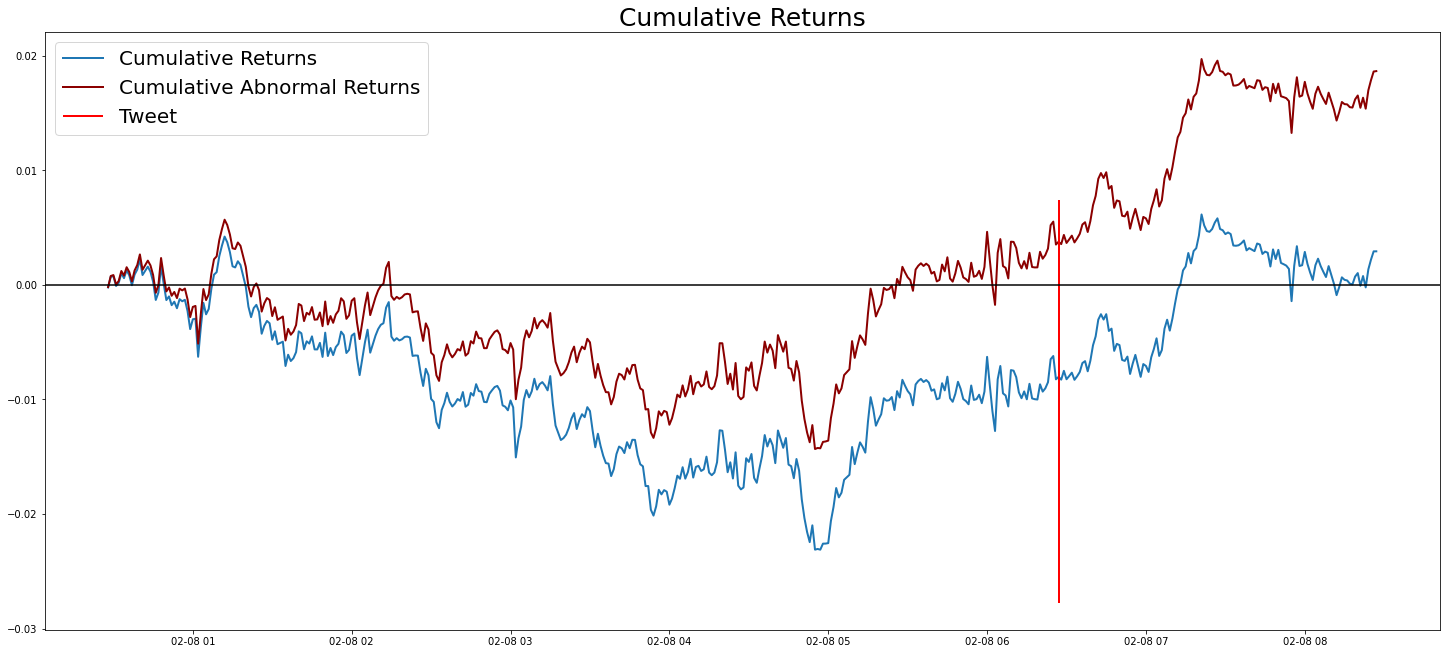

C:\Users\ckopp\AppData\Local\Temp\ipykernel_20088\1494792337.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced['log_returns'] = np.log(doge_sliced['Close'] / doge_sliced['Close'].shift(1))
C:\Users\ckopp\AppData\Local\Temp\ipykernel_20088\1494792337.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced.loc[0, 'log_returns'] = 0


Expected Return =  1.6185860934175017e-05
T[0; 1] =  1.9680084838667056
T[0; 5] =  0.7847762301302431
T[0; 10] =  0.8405360578491634
T[0; 30] =  0.6897716937004076
T[0; 60] =  0.004922454196945295
T[0; 120] =  0.06369895437393511


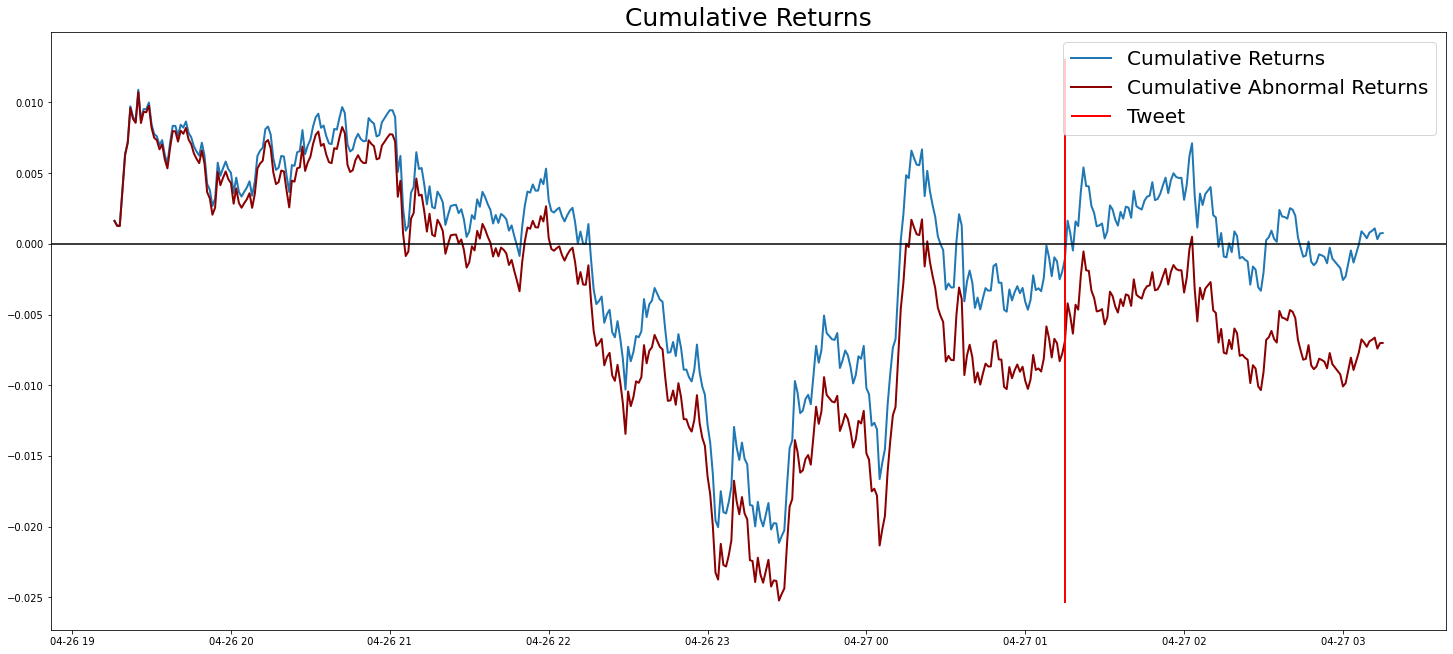

C:\Users\ckopp\AppData\Local\Temp\ipykernel_20088\1494792337.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced['log_returns'] = np.log(doge_sliced['Close'] / doge_sliced['Close'].shift(1))
C:\Users\ckopp\AppData\Local\Temp\ipykernel_20088\1494792337.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced.loc[0, 'log_returns'] = 0


Expected Return =  4.376896520752517e-05
T[0; 1] =  -0.00850697933021329
T[0; 5] =  -0.43889979760270353
T[0; 10] =  -0.18223187724538176
T[0; 30] =  -1.4851619307156743
T[0; 60] =  -0.9456247461899305
T[0; 120] =  -1.1757504693661325


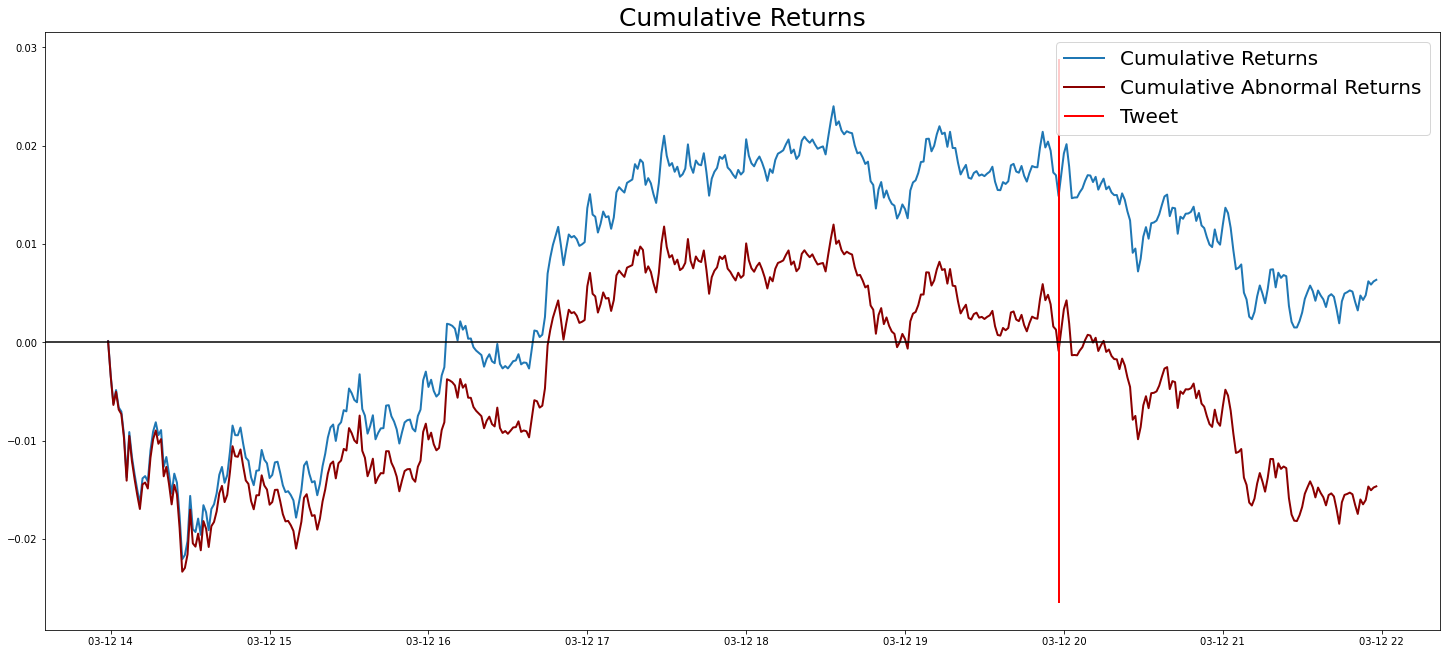

C:\Users\ckopp\AppData\Local\Temp\ipykernel_20088\1494792337.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced['log_returns'] = np.log(doge_sliced['Close'] / doge_sliced['Close'].shift(1))
C:\Users\ckopp\AppData\Local\Temp\ipykernel_20088\1494792337.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced.loc[0, 'log_returns'] = 0


Expected Return =  -6.783574621180515e-05
T[0; 1] =  -0.8610718092778838
T[0; 5] =  -1.7345142437956014
T[0; 10] =  -1.0207866541527018
T[0; 30] =  -1.3710852850815833
T[0; 60] =  -0.9133482038214915
T[0; 120] =  -1.8467429456448003


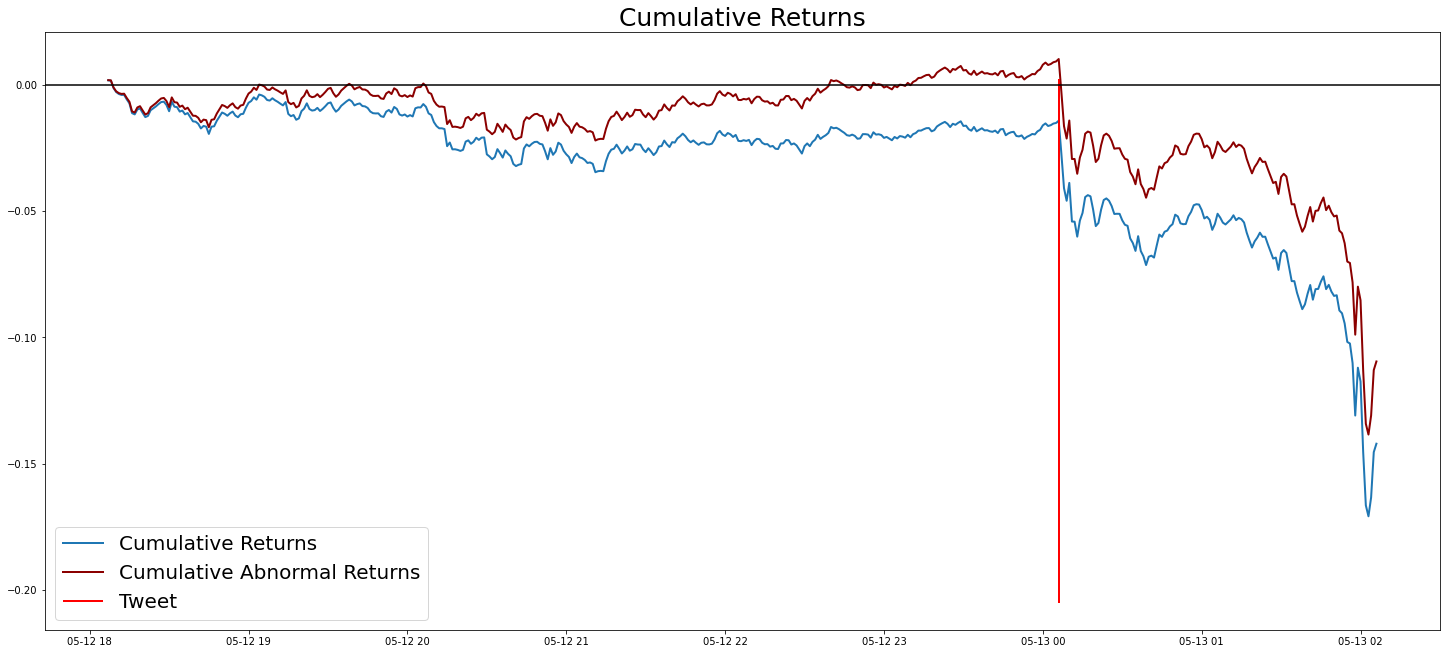

ar_frame:
       AR_0      AR_1      AR_2      AR_3      AR_4      AR_5      AR_6  \
0  -0.00054 -0.001128 -0.000219 -0.000539 -0.000052 -0.000348  0.000234   
1 -0.000557   0.00033 -0.001134  0.001204  0.001253 -0.001927 -0.000224   
2  0.000244 -0.000204  0.000799 -0.000701  0.000308  0.000332 -0.000592   
3  0.000871   0.00267 -0.000892 -0.001251  0.002044 -0.000348  0.002429   
4  -0.00216  0.002124  0.002117    0.0009 -0.002345 -0.003239  0.000026   
5  0.000966 -0.012934 -0.013628  -0.00494  0.007154 -0.015236  0.000015   

       AR_7      AR_8      AR_9     AR_10  
0 -0.001221 -0.001389 -0.001479 -0.000415  
1 -0.001122 -0.001816  0.001667 -0.000758  
2  0.000346  0.000402  0.000816  0.000198  
3  0.001686 -0.001331  -0.00004 -0.001407  
4 -0.000034  0.000481  0.000351  0.000712  
5 -0.005868  0.006444  0.003087  0.006351  
car_frame:
      CAR_1     CAR_2     CAR_5    CAR_10    CAR_30    CAR_60   CAR_120
0 -0.001668 -0.001887 -0.002826 -0.007096  -0.00493 -0.007299 -0.005485
1

In [6]:
df['Date'] = df['timestamp'].apply(lambda x: dt.fromtimestamp(x))


ar_ges = pd.DataFrame(columns=['AR_0', 'AR_1', 'AR_2', 'AR_3', 'AR_4', 'AR_5', 'AR_6', 'AR_7', 'AR_8', 'AR_9', 'AR_10', ])
car_ges = pd.DataFrame(columns = ['CAR_1', 'CAR_2', 'CAR_5', 'CAR_10', 'CAR_30', 'CAR_60', 'CAR_120'])

for _, tweet in df_tweets_relevant.iterrows():
    timestamp = tweet['timestamp']
    doge_sliced = df[(df['timestamp'] >= timestamp-360*60) & (df['timestamp'] <= timestamp+120*60)]
    # Es werden nach Tweets gesucht, die 240 Minuten vor und 100 Minuten nach dem Event stattgefunden haben.
    tweets_sliced = df_tweets[(df_tweets['timestamp'] >= timestamp-240*60) & (df_tweets['timestamp'] <= timestamp+100*60)]
    
    # Ausrechnen der Renditen
    doge_sliced['log_returns'] = np.log(doge_sliced['Close'] / doge_sliced['Close'].shift(1))
    # Erste Rendite wird 0 gesetzt
    doge_sliced.loc[0, 'log_returns'] = 0
    # Kumulierte Renditen
    doge_sliced['cum_log_returns'] = np.cumsum(doge_sliced['log_returns'])

    # Expected Returns which are based on the mean value of the returns of the last 5 hours before the tweet.
    # Event Takes place at t=360
    expected_return = np.mean(doge_sliced['log_returns'].iloc[1:301]) # Fehler bei Ante, da Ante 1:301 nimmt und nicht 0:300
    print('Expected Return = ', expected_return)
    
    # Abnormal Returns based on After Returns - Mean Value of Returns (before Tweet)
    doge_sliced['abnormal_returns'] = doge_sliced['log_returns'] - expected_return
    doge_sliced['abnormal_returns_cum'] = np.cumsum(doge_sliced['abnormal_returns'])


    ar_values = []
    for event_horizon in range(11):
        ar_values.append(doge_sliced['abnormal_returns'].iloc[360+event_horizon])
    ar_ges = pd.concat([ar_ges, pd.DataFrame([ar_values], columns=ar_ges.columns)], ignore_index=True)



    car_values = []
    for event_horizon in [1, 2, 5, 10, 30, 60, 120]:
        car_values.append(doge_sliced['abnormal_returns'].iloc[360:360+event_horizon+1].sum())
    car_ges = pd.concat([car_ges, pd.DataFrame([car_values], columns=car_ges.columns)], ignore_index=True)

    # T-Statistiken für [1, 5, 10, 30, 60, 120]
    for event_horizon in [1, 5, 10, 30, 60, 120]:
        print(f'T[0; {event_horizon}] = ', (doge_sliced['abnormal_returns'].iloc[360:360+event_horizon+1].mean() / doge_sliced['abnormal_returns'].iloc[360:360+event_horizon+1].std()) * np.sqrt(event_horizon+1)) # <-- richtiger Wert
        
    fig = plt.figure(1, figsize = (25, 11))
    plt.plot(doge_sliced["Date"], doge_sliced['cum_log_returns'], lw=2, label='Cumulative Returns')
    plt.plot(doge_sliced["Date"], doge_sliced['abnormal_returns_cum'], lw=2, label='Cumulative Abnormal Returns', color='darkred')
    plt.vlines(dt.fromtimestamp(timestamp), label='Tweet', ymin=doge_sliced['cum_log_returns'].min()*1.2, ymax=doge_sliced['cum_log_returns'].max()*1.2, colors='red', lw=2) 

    if len(tweets_sliced) > 1:
        plt.vlines([dt.fromtimestamp(i) for i in tweets_sliced['timestamp'] if i != timestamp], label='Other Tweets', ymin=0, ymax=doge_sliced['abnormal_returns_cum'].max()*1.2, colors='orange', lw=2) 
    plt.axhline(0, color = 'black')
    plt.legend(loc='best', fontsize=20)
    plt.title('Cumulative Returns', size=25)

    plt.show()

print('ar_frame:')
print(ar_ges)

print('car_frame:')
print(car_ges)

C:\Users\ckopp\AppData\Local\Temp\ipykernel_20088\1484456187.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced['CAR'] = doge_sliced['Close']/base_value


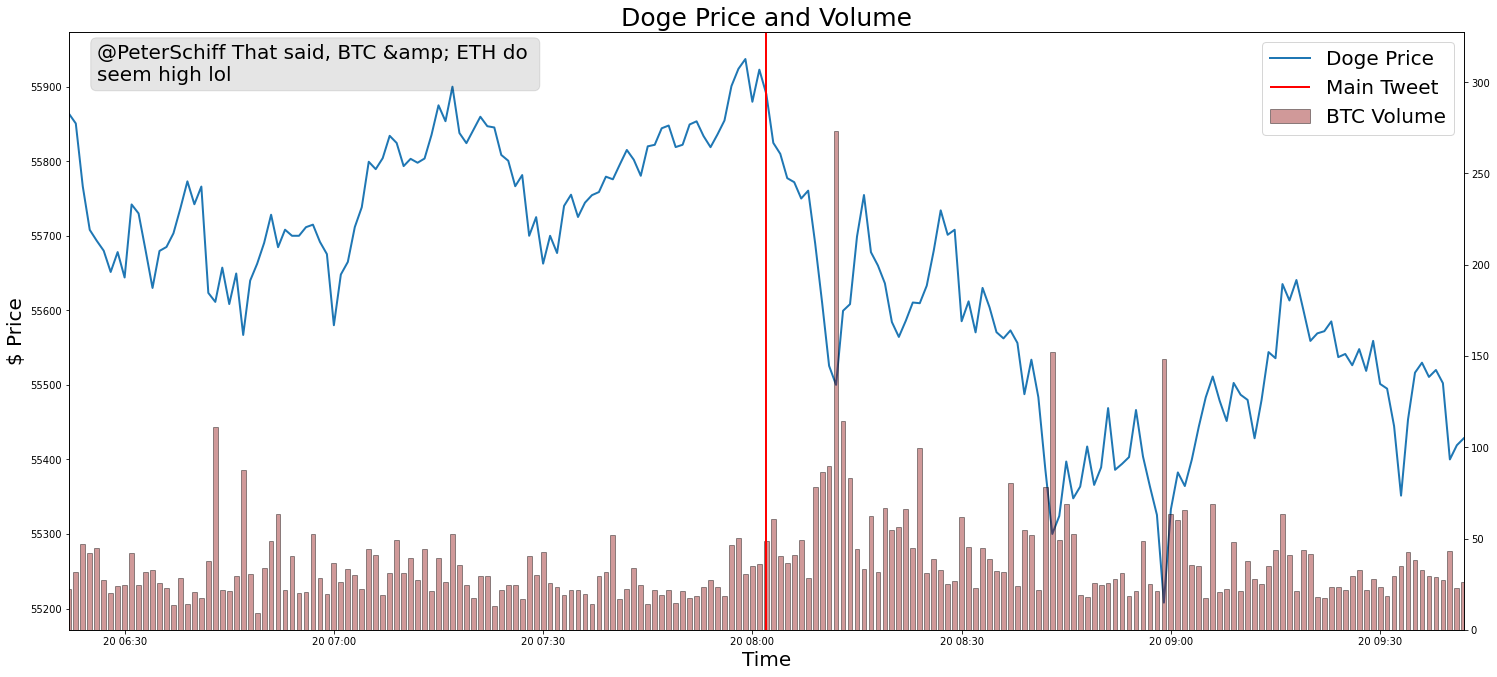

C:\Users\ckopp\AppData\Local\Temp\ipykernel_20088\1484456187.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced['CAR'] = doge_sliced['Close']/base_value
C:\Users\ckopp\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 127926 (\N{MULTIPLE MUSICAL NOTES}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


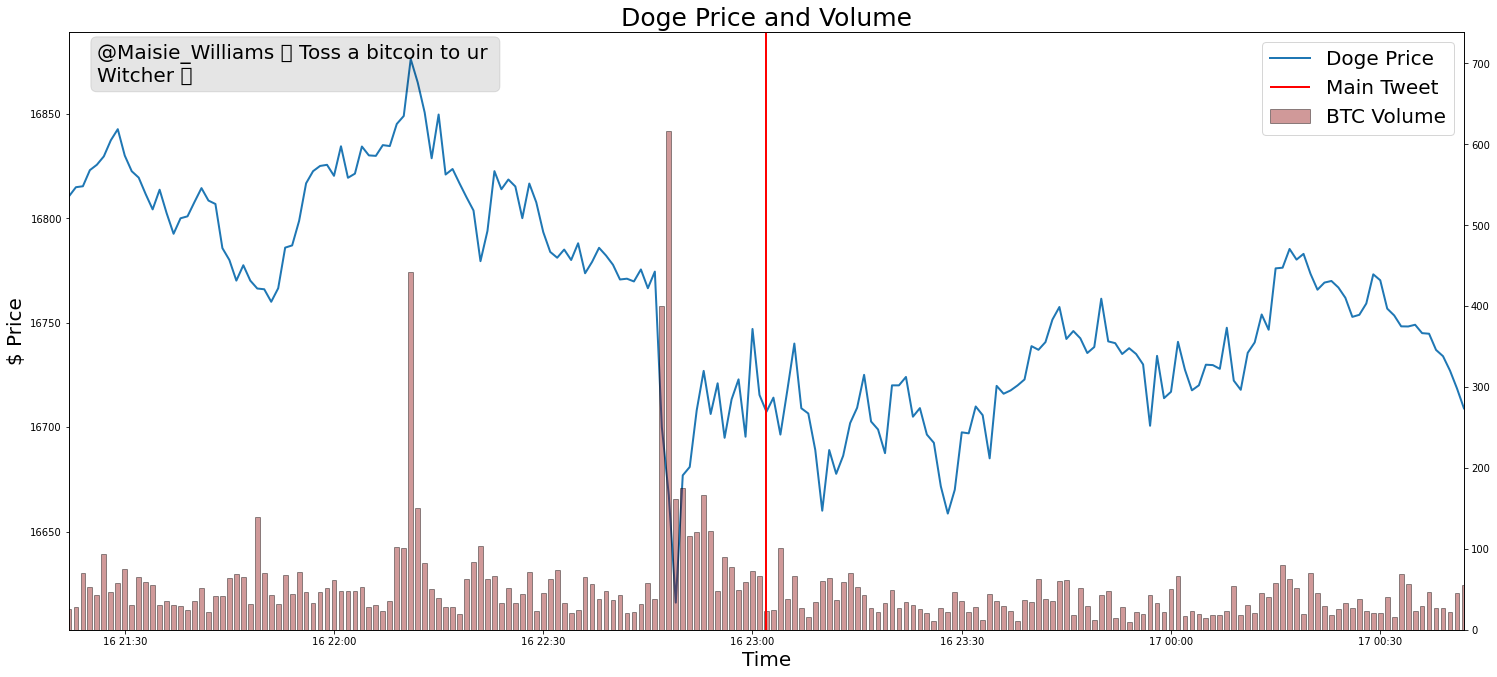

C:\Users\ckopp\AppData\Local\Temp\ipykernel_20088\1484456187.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced['CAR'] = doge_sliced['Close']/base_value


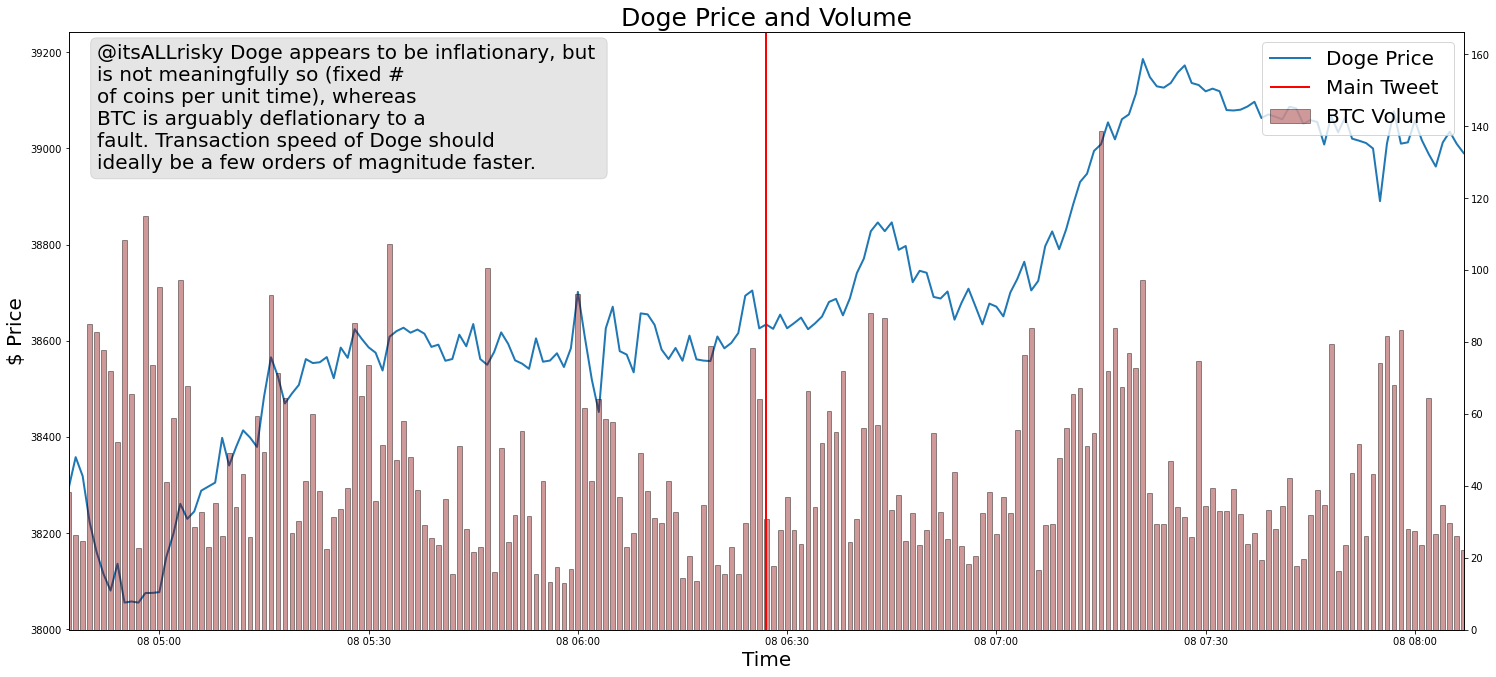

C:\Users\ckopp\AppData\Local\Temp\ipykernel_20088\1484456187.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced['CAR'] = doge_sliced['Close']/base_value


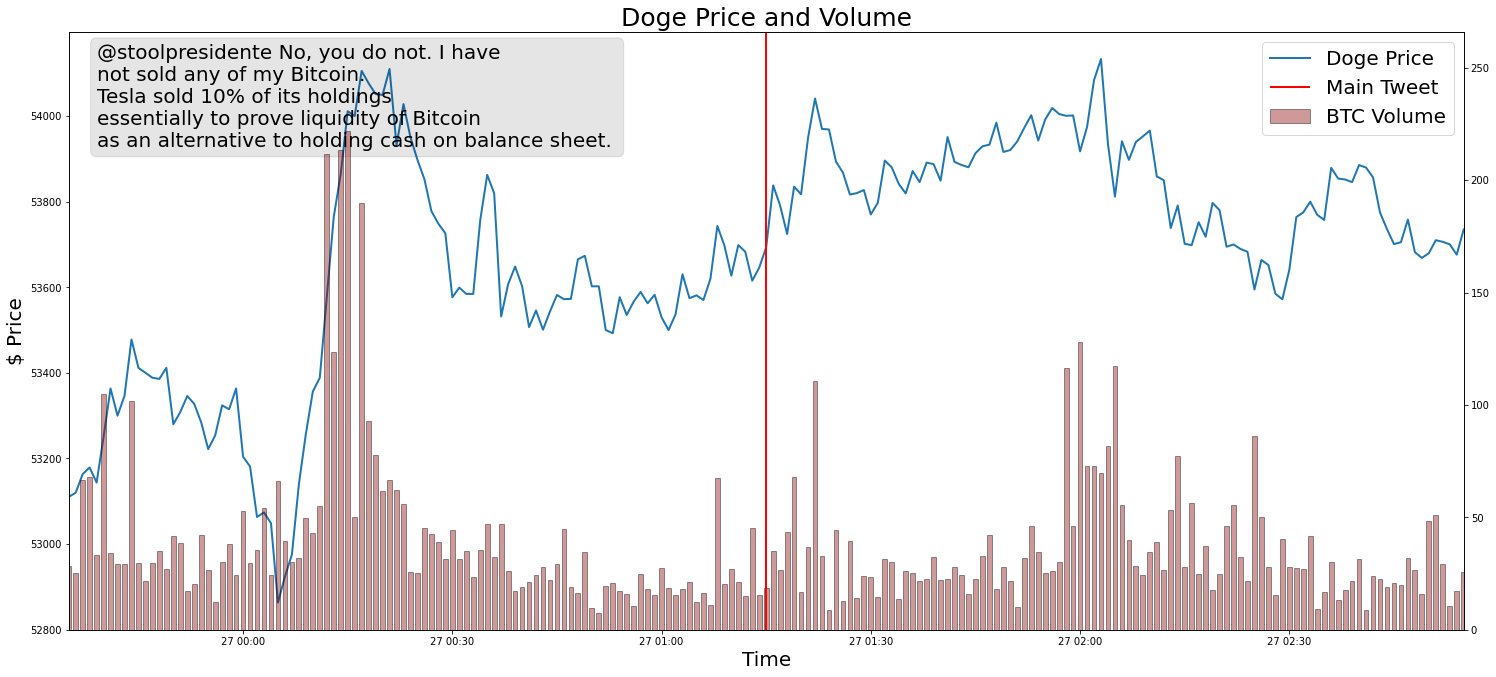

C:\Users\ckopp\AppData\Local\Temp\ipykernel_20088\1484456187.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced['CAR'] = doge_sliced['Close']/base_value


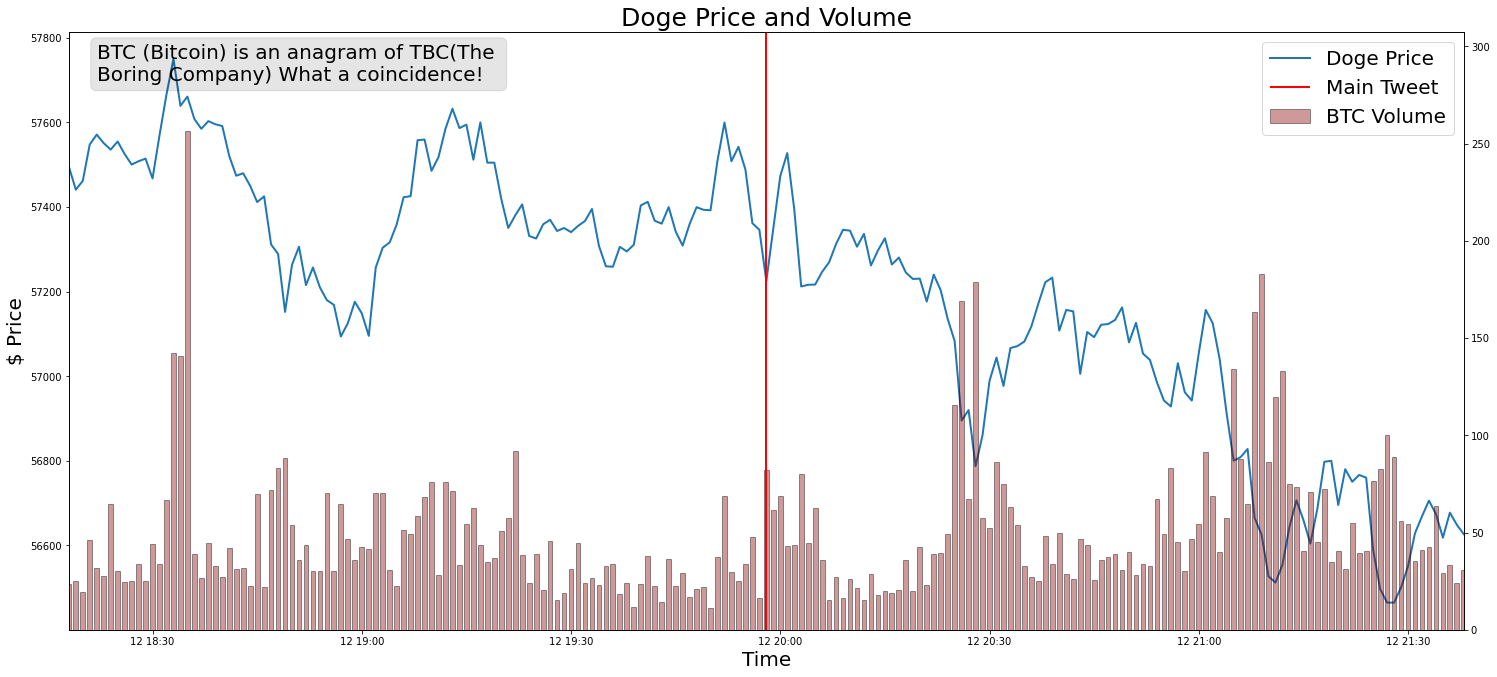

C:\Users\ckopp\AppData\Local\Temp\ipykernel_20088\1484456187.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced['CAR'] = doge_sliced['Close']/base_value


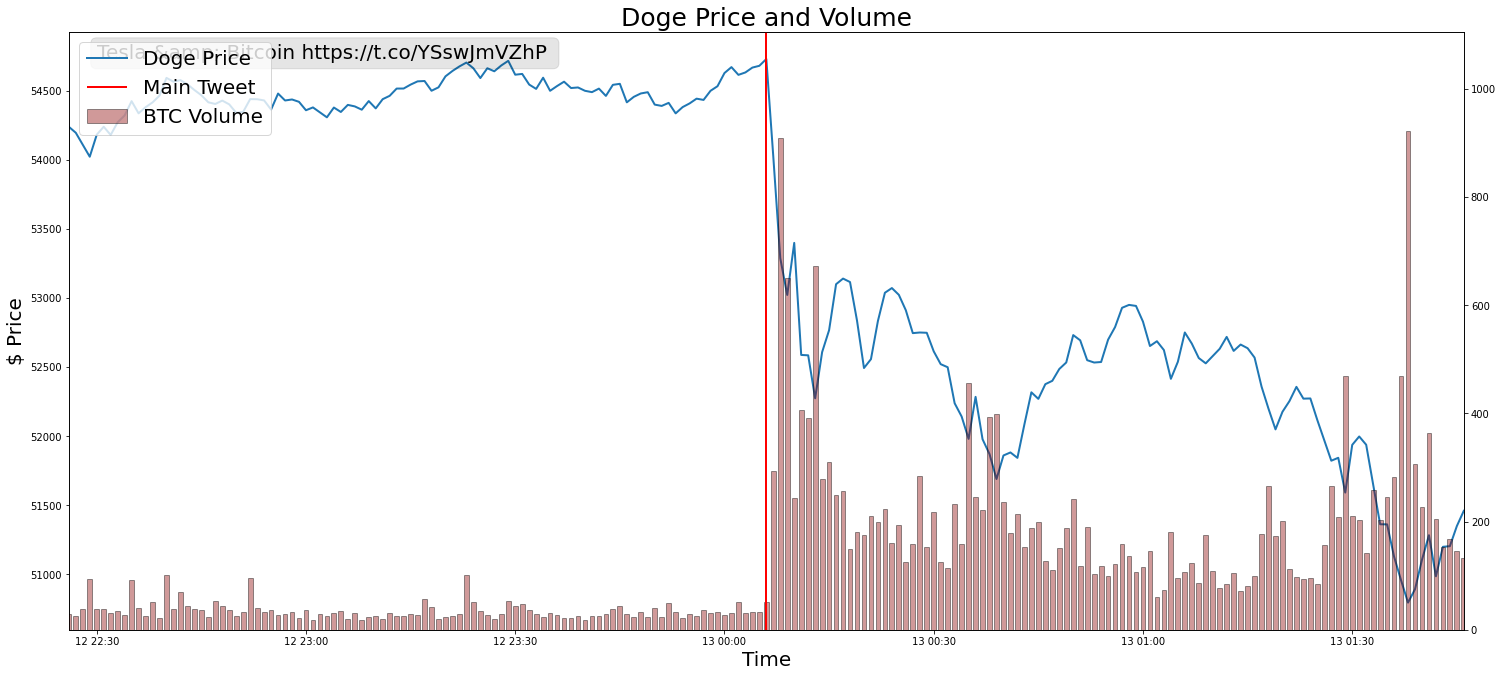

In [8]:
df['Date'] = df['timestamp'].apply(lambda x: dt.fromtimestamp(x))

for _, tweet in df_tweets_relevant.iterrows():
    timestamp = tweet['timestamp']
    doge_sliced = df[(df['timestamp'] >= timestamp-100*60) & (df['timestamp'] <= timestamp+100*60)]
    tweets_sliced = df_tweets[(df_tweets['timestamp'] >= timestamp-100*60) & (df_tweets['timestamp'] <= timestamp+100*60)]

    base_value = doge_sliced.iloc[0, 4]
    doge_sliced['CAR'] = doge_sliced['Close']/base_value

    fig = plt.figure(1, figsize = (25, 11))
    ax = fig.add_subplot(111)
    ax.plot(doge_sliced['Date'], doge_sliced['Close'], lw=2, label="Doge Price")

    ax2 = ax.twinx()
    ax2.bar(doge_sliced['Date'], doge_sliced['Volume'], label="BTC Volume", color='darkred', alpha=0.4, width=1/(35*60), edgecolor='black')
    ax2.vlines(dt.fromtimestamp(timestamp), label='Main Tweet', ymin=0, ymax=doge_sliced['Volume'].max()*1.2, colors='red', lw=2) 

    if len(tweets_sliced) > 1:
        ax2.vlines([dt.fromtimestamp(i) for i in tweets_sliced['timestamp'] if i != timestamp], label='Other Tweets', ymin=0, ymax=doge_sliced['Volume'].max()*1.2, colors='orange', lw=2) 
   
    ax2.set_ylim(0, doge_sliced['Volume'].max()*1.2)
    ax.set_xlim(min(doge_sliced['Date']), max(doge_sliced['Date']))
    ax.set_xlabel("Time", size=20)
    ax.set_ylabel("$ Price", size=20)

    t = [i + ' ' for i in tweet['Text'].split()]
    for i in range(7, len(t), 7):
        t.insert(i, '\n')
    anno = ''.join(t)

    ax.text(0.02, 0.98, anno, transform=ax.transAxes, bbox={'boxstyle':'round', 'facecolor':'black', 'alpha':0.1}, fontsize = 20, va='top')
    

    li, la = ax.get_legend_handles_labels()
    li2, la2 = ax2.get_legend_handles_labels()
    plt.legend(li+li2, la+la2, loc='best', fontsize = 20)
    # plt.legend(loc='best', fontsize=20)
    plt.title('Doge Price and Volume', size=25)

    plt.show()

    #print(tweet['Text'])

C:\Users\ckopp\AppData\Local\Temp\ipykernel_20088\2581092247.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced['log_vol'] = np.log(doge_sliced['Quote Asset Volume']+1)
C:\Users\ckopp\AppData\Local\Temp\ipykernel_20088\2581092247.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced['cum_log_vol'] = np.cumsum(doge_sliced['log_vol'])
C:\Users\ckopp\AppData\Local\Temp\ipykernel_20088\2581092247.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

Expected Volume =  14.590686999852556
T[0; 1] =  3.0920836166575913
T[0; 5] =  2.0552057809753332
T[0; 10] =  2.3750987744332295
T[0; 30] =  2.9473725183574335
T[0; 60] =  2.002617429861904
T[0; 120] =  0.22157795844891717


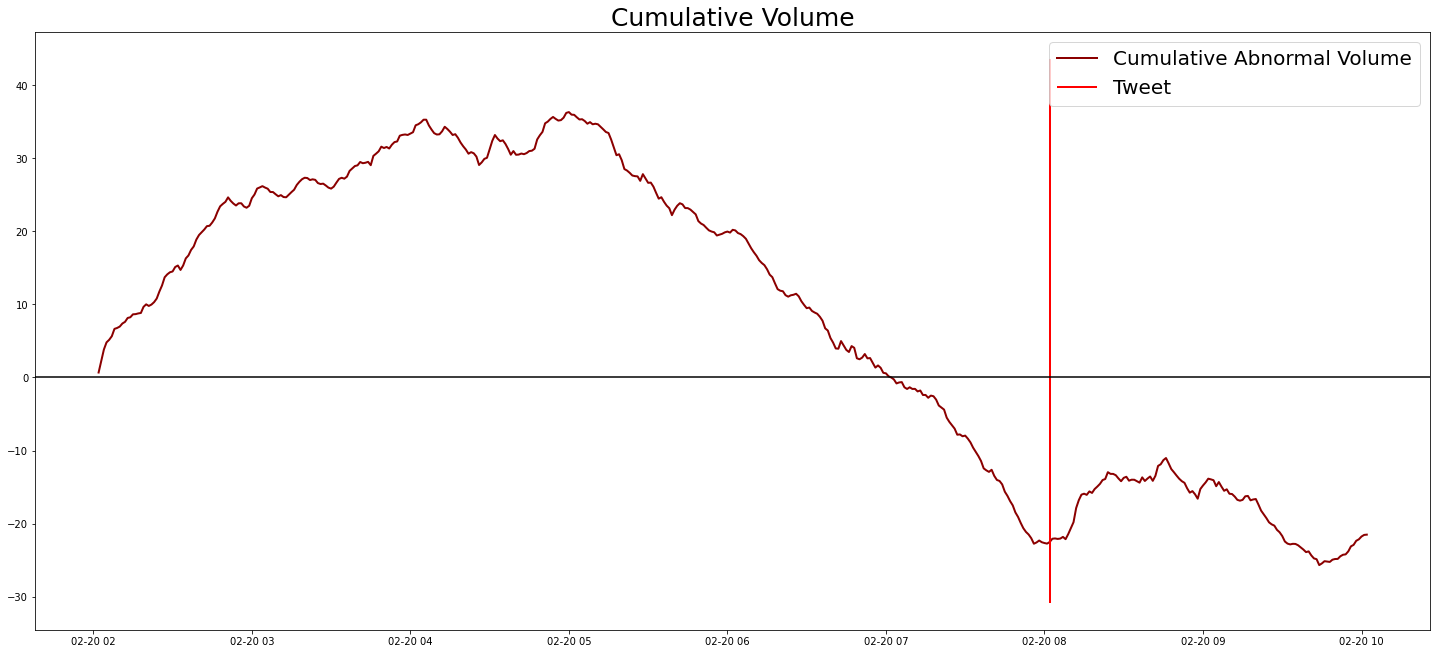

C:\Users\ckopp\AppData\Local\Temp\ipykernel_20088\2581092247.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced['log_vol'] = np.log(doge_sliced['Quote Asset Volume']+1)
C:\Users\ckopp\AppData\Local\Temp\ipykernel_20088\2581092247.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced['cum_log_vol'] = np.cumsum(doge_sliced['log_vol'])
C:\Users\ckopp\AppData\Local\Temp\ipykernel_20088\2581092247.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

Expected Volume =  13.925533738219801
T[0; 1] =  -29.391829763655217
T[0; 5] =  -2.105841446122077
T[0; 10] =  -3.232401079628851
T[0; 30] =  -7.818051219795866
T[0; 60] =  -11.183601154476532
T[0; 120] =  -15.6612200845633


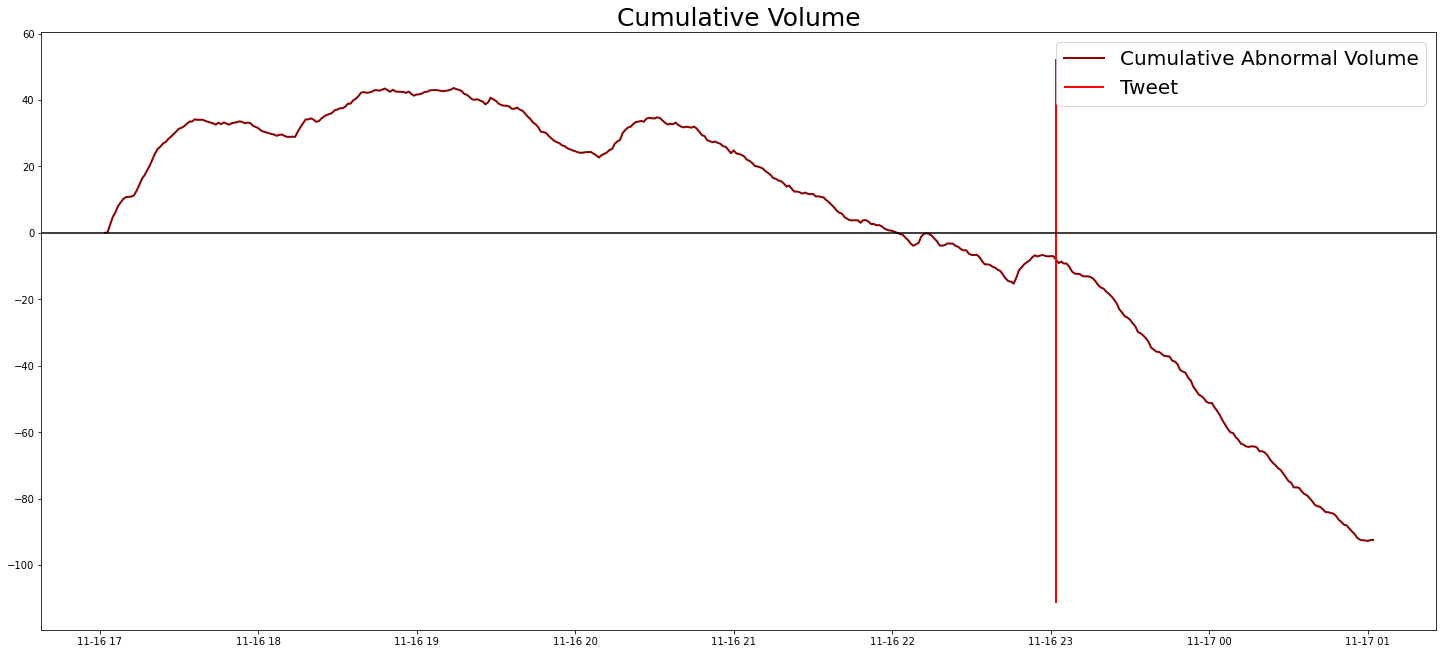

C:\Users\ckopp\AppData\Local\Temp\ipykernel_20088\2581092247.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced['log_vol'] = np.log(doge_sliced['Quote Asset Volume']+1)
C:\Users\ckopp\AppData\Local\Temp\ipykernel_20088\2581092247.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced['cum_log_vol'] = np.cumsum(doge_sliced['log_vol'])
C:\Users\ckopp\AppData\Local\Temp\ipykernel_20088\2581092247.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

Expected Volume =  14.21265846889777
T[0; 1] =  -1.7939947200458697
T[0; 5] =  -3.5552253487856937
T[0; 10] =  -0.43098699115266786
T[0; 30] =  -0.7000190379979527
T[0; 60] =  1.3995042977320358
T[0; 120] =  -0.6412127943632072


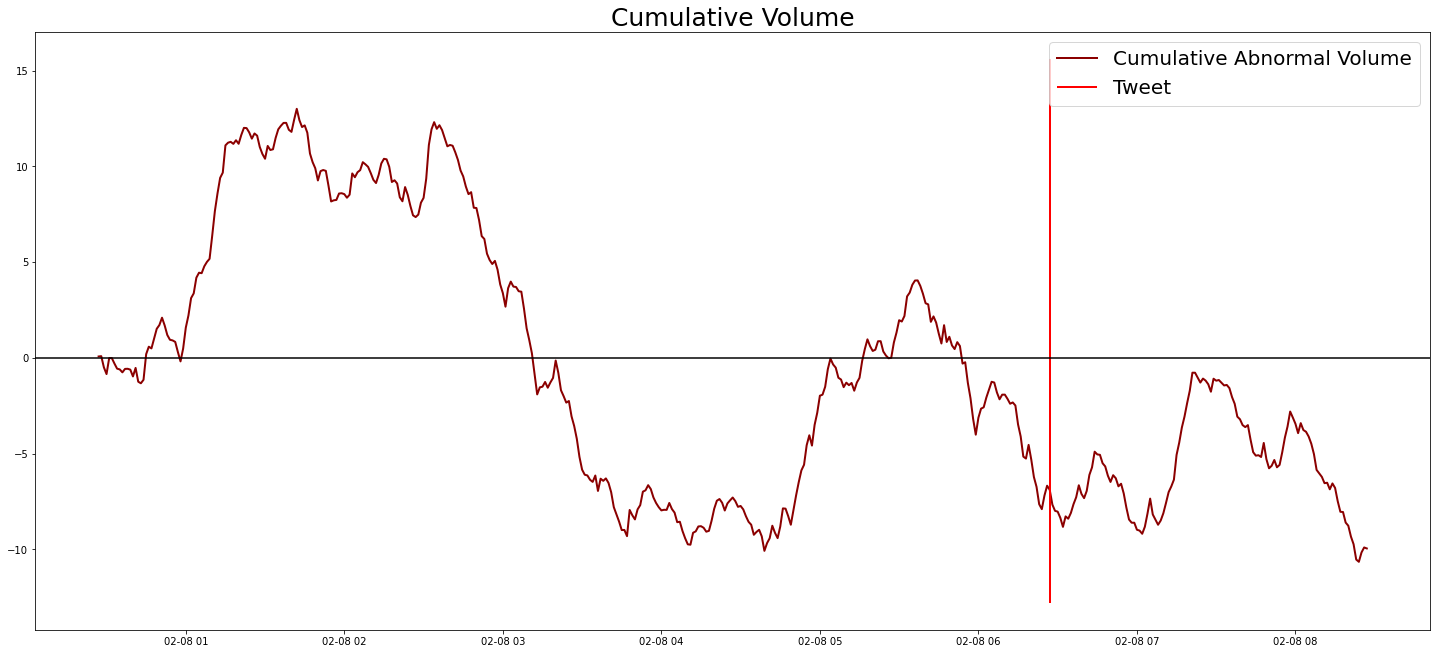

C:\Users\ckopp\AppData\Local\Temp\ipykernel_20088\2581092247.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced['log_vol'] = np.log(doge_sliced['Quote Asset Volume']+1)
C:\Users\ckopp\AppData\Local\Temp\ipykernel_20088\2581092247.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced['cum_log_vol'] = np.cumsum(doge_sliced['log_vol'])
C:\Users\ckopp\AppData\Local\Temp\ipykernel_20088\2581092247.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

Expected Volume =  14.769545025404618
T[0; 1] =  -1.9896263571511343
T[0; 5] =  -2.0642614356844082
T[0; 10] =  -1.8816751344841491
T[0; 30] =  -7.034547239287051
T[0; 60] =  -5.284515449179588
T[0; 120] =  -10.638841818697948


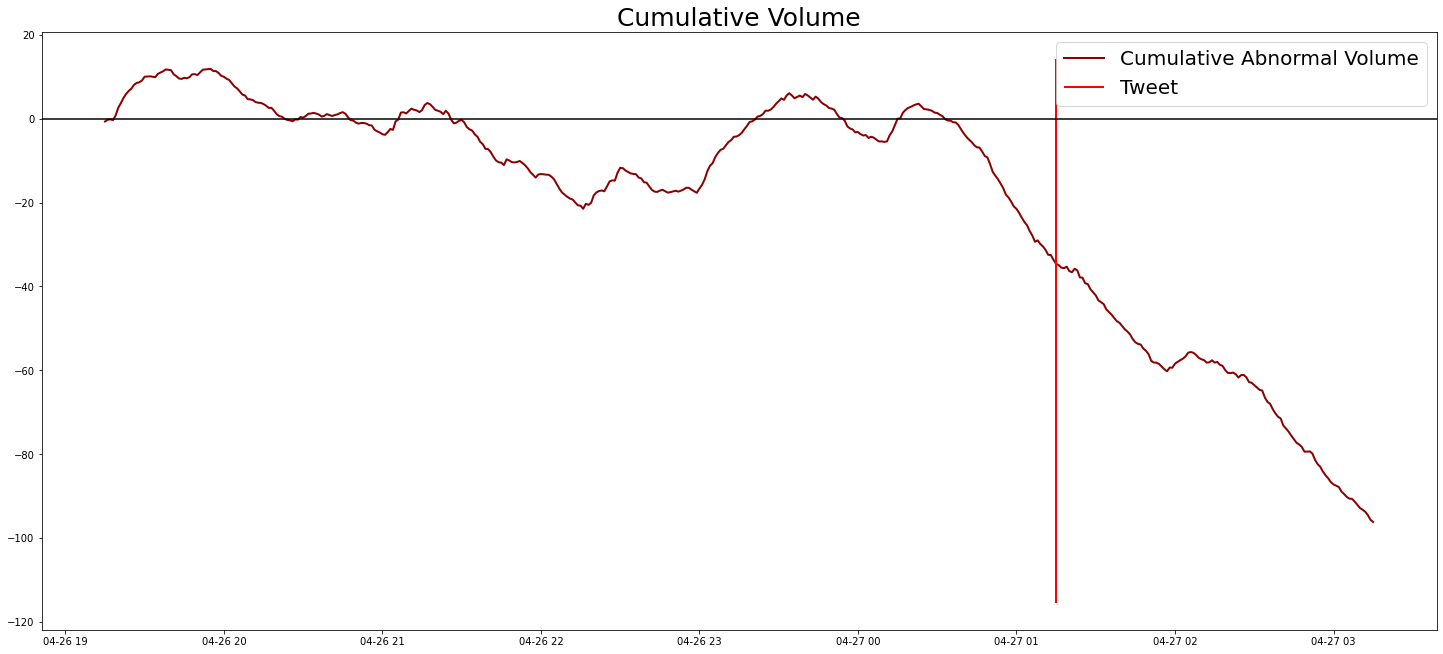

C:\Users\ckopp\AppData\Local\Temp\ipykernel_20088\2581092247.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced['log_vol'] = np.log(doge_sliced['Quote Asset Volume']+1)
C:\Users\ckopp\AppData\Local\Temp\ipykernel_20088\2581092247.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced['cum_log_vol'] = np.cumsum(doge_sliced['log_vol'])
C:\Users\ckopp\AppData\Local\Temp\ipykernel_20088\2581092247.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

Expected Volume =  15.068906205543291
T[0; 1] =  1.0392150702614342
T[0; 5] =  0.00967087052903213
T[0; 10] =  -1.804396666049905
T[0; 30] =  -3.787482982962233
T[0; 60] =  -6.16200733970038
T[0; 120] =  -6.398342826307026


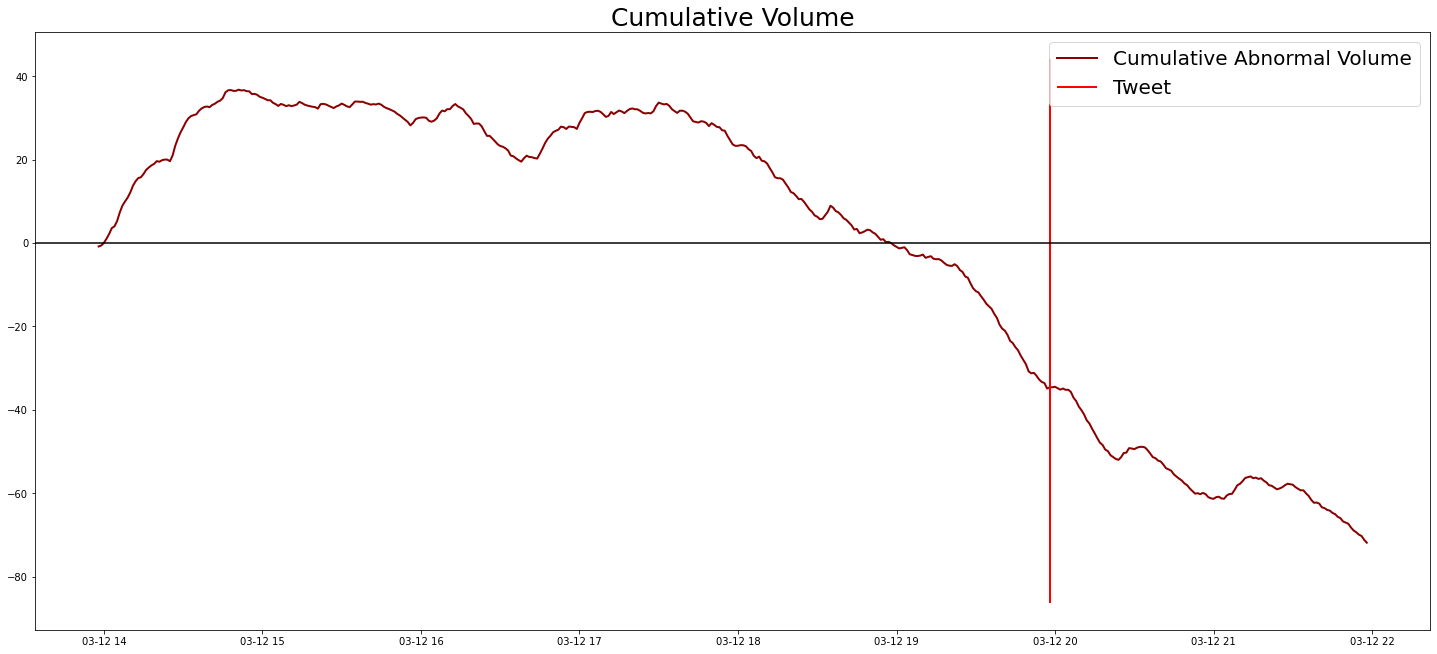

C:\Users\ckopp\AppData\Local\Temp\ipykernel_20088\2581092247.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced['log_vol'] = np.log(doge_sliced['Quote Asset Volume']+1)
C:\Users\ckopp\AppData\Local\Temp\ipykernel_20088\2581092247.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced['cum_log_vol'] = np.cumsum(doge_sliced['log_vol'])
C:\Users\ckopp\AppData\Local\Temp\ipykernel_20088\2581092247.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

Expected Volume =  15.023467795268024
T[0; 1] =  0.8116649061425891
T[0; 5] =  3.9588730600732696
T[0; 10] =  7.3642201256119435
T[0; 30] =  12.647993927497945
T[0; 60] =  15.37775069784922
T[0; 120] =  19.404790283636817


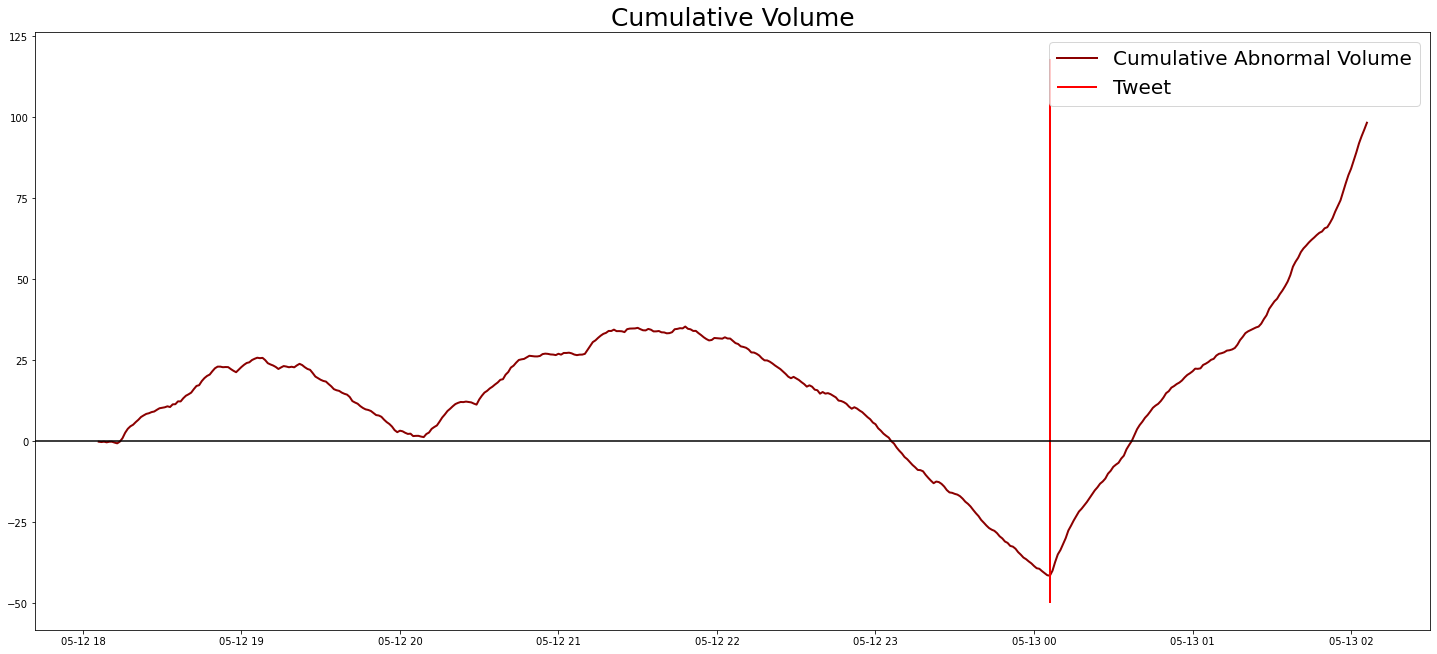

atv_frame:
      ATV_0     ATV_1     ATV_2     ATV_3     ATV_4     ATV_5     ATV_6  \
0  0.226371  0.442778  0.039438 -0.065073    0.0467  0.229855 -0.312812   
1  -1.07371 -1.003052  0.417885 -0.574676  0.005021 -0.907989 -1.437073   
2 -0.218768 -0.769826 -0.323354 -0.041934 -0.322474 -0.472836  0.547073   
3 -0.956395 -0.316586 -0.595856 -0.103652  0.343007 -1.048871  -0.27345   
4  0.297212  0.005716  0.120751 -0.348869 -0.336934  0.268913 -0.316857   
5 -0.162517  1.563312  2.677248  2.333542  1.359361  1.859642  1.820112   

      ATV_7     ATV_8     ATV_9    ATV_10  
0  0.699467  0.797146  0.829562  1.942938  
1 -0.657753 -0.101897 -0.040535 -0.609833  
2 -0.122037  0.302592  0.458784  0.358679  
3  0.832208 -0.386328 -1.675917 -0.085526  
4  0.022417 -0.535446 -1.375826 -0.803629  
5   2.35123  1.474588  1.585257  1.374253  
catv_frame:
Empty DataFrame
Columns: [CATV_1, CATV_2, CATV_5, CATV_10, CATV_30, CATV_60, CATV_120]
Index: []


In [12]:
# Volume
df['Date'] = df['timestamp'].apply(lambda x: dt.fromtimestamp(x))


atv_ges = pd.DataFrame(columns=['ATV_0', 'ATV_1', 'ATV_2', 'ATV_3', 'ATV_4', 'ATV_5', 'ATV_6', 'ATV_7', 'ATV_8', 'ATV_9', 'ATV_10'])
catv_ges = pd.DataFrame(columns = ['CATV_1', 'CATV_2', 'CATV_5', 'CATV_10', 'CATV_30', 'CATV_60', 'CATV_120'])

for _, tweet in df_tweets_relevant.iterrows():
    timestamp = tweet['timestamp']
    doge_sliced = df[(df['timestamp'] >= timestamp-360*60) & (df['timestamp'] <= timestamp+120*60)]
    # Es werden nach Tweets gesucht, die 240 Minuten vor und 100 Minuten nach dem Event stattgefunden haben.
    tweets_sliced = df_tweets[(df_tweets['timestamp'] >= timestamp-240*60) & (df_tweets['timestamp'] <= timestamp+100*60)]
    
    # Ausrechnen der Renditen
    doge_sliced['log_vol'] = np.log(doge_sliced['Quote Asset Volume']+1)

    
    ###################################################################################################################
    # Kumulierte Renditen
    doge_sliced['cum_log_vol'] = np.cumsum(doge_sliced['log_vol'])
    ###################################################################################################################


    # Expected Volume which are based on the mean value of the returns of the last 5 hours before the tweet.
    # Event Takes place at t=360
    expected_volume = np.mean(doge_sliced['log_vol'].iloc[:301]) # Fehler bei Ante, da Ante 1:301 nimmt und nicht 0:300? --> Upper bound excluded
    print('Expected Volume = ', expected_volume)
    
    # Abnormal Returns based on After Returns - Mean Value of Returns (before Tweet)
    doge_sliced['abnormal_volume'] = doge_sliced['log_vol'] - expected_volume
    doge_sliced['abnormal_volume_cum'] = np.cumsum(doge_sliced['abnormal_volume'])


    atv_values = []
    for event_horizon in range(11):
        atv_values.append(doge_sliced['abnormal_volume'].iloc[360+event_horizon])
    atv_ges = pd.concat([atv_ges, pd.DataFrame([atv_values], columns=atv_ges.columns)], ignore_index=True)



    catv_values = []
    for event_horizon in [1, 2, 5, 10, 30, 60, 120]:
        catv_values.append(doge_sliced['abnormal_volume'].iloc[360:360+event_horizon+1].sum())
    catv_ges = pd.concat([catv_ges, pd.DataFrame([catv_values], columns=catv_ges.columns)], ignore_index=True)


    # T-Statistiken für [1, 5, 10, 30, 60, 120]
    for event_horizon in [1, 5, 10, 30, 60, 120]:
        print(f'T[0; {event_horizon}] = ', (doge_sliced['abnormal_volume'].iloc[360:360+event_horizon+1].mean() / doge_sliced['abnormal_volume'].iloc[360:360+event_horizon+1].std()) * np.sqrt(event_horizon+1)) # <-- richtiger Wert
        
    fig = plt.figure(1, figsize = (25, 11))
    # plt.plot(doge_sliced["Date"], doge_sliced['cum_log_vol'], lw=2, label='Cumulative Volume')
    plt.plot(doge_sliced["Date"], doge_sliced['abnormal_volume_cum'], lw=2, label='Cumulative Abnormal Volume', color='darkred')
    plt.vlines(dt.fromtimestamp(timestamp), label='Tweet', ymin=doge_sliced['abnormal_volume_cum'].min()*1.2, ymax=doge_sliced['abnormal_volume_cum'].max()*1.2, colors='red', lw=2) 

    if len(tweets_sliced) > 1:
        plt.vlines([dt.fromtimestamp(i) for i in tweets_sliced['timestamp'] if i != timestamp], label='Other Tweets', ymin=0, ymax=doge_sliced['abnormal_volume_cum'].max()*1.2, colors='orange', lw=2) 
    plt.axhline(0, color = 'black')
    plt.legend(loc='best', fontsize=20)
    plt.title('Abnormal Volume', size=25)

    plt.show()

print('atv_frame:')
print(atv_ges)

print('catv_frame:')
print(catv_ges)